### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
#from stable_baselines.common.policies import MlpPolicy
from stable_baselines3 import PPO
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 3
max_inventory_amount_regional_warehouses = 40
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = [1,2,3]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 8

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount)

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 13 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 13 ; Demand: 2 ; Lost sales: 0
regional_warehouse_3 ; ID: 3 ; Inventory: 13 ; Demand: 3 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
Observation space: Dict(rw_inventories:MultiDiscrete([41 41 41]))
Action space: MultiDiscrete([2 2 2])
Starting state: {'rw_inventories': array([13, 13, 13])}
________________________________________________________________________________


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO("MultiInputPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=300000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | 1.26     |
| time/              |          |
|    fps             | 926      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 1.3         |
| time/                   |             |
|    fps                  | 648         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010752641 |
|    clip_fraction        | 0.0773      |
|    clip_range           | 0.2         |
|    entropy_loss   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 2.22        |
| time/                   |             |
|    fps                  | 472         |
|    iterations           | 11          |
|    time_elapsed         | 47          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.017727166 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.65       |
|    explained_variance   | 0.36        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.199       |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0341     |
|    value_loss           | 0.443       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 4.64        |
| time/                   |             |
|    fps                  | 481         |
|    iterations           | 21          |
|    time_elapsed         | 89          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.009539729 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.838      |
|    explained_variance   | 0.332       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.376       |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 0.884       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 6.08         |
| time/                   |              |
|    fps                  | 492          |
|    iterations           | 31           |
|    time_elapsed         | 128          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0055987425 |
|    clip_fraction        | 0.0715       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.453       |
|    explained_variance   | 0.409        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.948        |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00967     |
|    value_loss           | 1.27         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 6.65         |
| time/                   |              |
|    fps                  | 484          |
|    iterations           | 41           |
|    time_elapsed         | 173          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0022693644 |
|    clip_fraction        | 0.0323       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.361        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.651        |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.0036      |
|    value_loss           | 1.54         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 6.76         |
| time/                   |              |
|    fps                  | 484          |
|    iterations           | 51           |
|    time_elapsed         | 215          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0043620467 |
|    clip_fraction        | 0.0422       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.215       |
|    explained_variance   | 0.346        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.913        |
|    n_updates            | 500          |
|    policy_gradient_loss | -0.00609     |
|    value_loss           | 1.8          |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 6.96         |
| time/                   |              |
|    fps                  | 473          |
|    iterations           | 61           |
|    time_elapsed         | 263          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0028854832 |
|    clip_fraction        | 0.0231       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.119       |
|    explained_variance   | 0.366        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.801        |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.00309     |
|    value_loss           | 1.68         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 6.95         |
| time/                   |              |
|    fps                  | 466          |
|    iterations           | 71           |
|    time_elapsed         | 311          |
|    total_timesteps      | 145408       |
| train/                  |              |
|    approx_kl            | 0.0016837023 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.122       |
|    explained_variance   | 0.374        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.898        |
|    n_updates            | 700          |
|    policy_gradient_loss | -0.000915    |
|    value_loss           | 1.62         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 7.07         |
| time/                   |              |
|    fps                  | 466          |
|    iterations           | 81           |
|    time_elapsed         | 355          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0025625296 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.112       |
|    explained_variance   | 0.467        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.738        |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.00194     |
|    value_loss           | 1.48         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 6.98         |
| time/                   |              |
|    fps                  | 463          |
|    iterations           | 91           |
|    time_elapsed         | 401          |
|    total_timesteps      | 186368       |
| train/                  |              |
|    approx_kl            | 0.0032473733 |
|    clip_fraction        | 0.0307       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.164       |
|    explained_variance   | 0.286        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.23         |
|    n_updates            | 900          |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 1.88         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 7.31        |
| time/                   |             |
|    fps                  | 458         |
|    iterations           | 101         |
|    time_elapsed         | 451         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.002834722 |
|    clip_fraction        | 0.0311      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.134      |
|    explained_variance   | 0.364       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.981       |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.00274    |
|    value_loss           | 1.81        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 7.31         |
| time/                   |              |
|    fps                  | 458          |
|    iterations           | 111          |
|    time_elapsed         | 496          |
|    total_timesteps      | 227328       |
| train/                  |              |
|    approx_kl            | 0.0010333965 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.111       |
|    explained_variance   | 0.255        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.3          |
|    n_updates            | 1100         |
|    policy_gradient_loss | -0.000549    |
|    value_loss           | 2.14         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 7.24        |
| time/                   |             |
|    fps                  | 454         |
|    iterations           | 121         |
|    time_elapsed         | 545         |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.003972979 |
|    clip_fraction        | 0.0217      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.133      |
|    explained_variance   | 0.237       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.14        |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.00139    |
|    value_loss           | 2.26        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30  

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 30         |
|    ep_rew_mean          | 7.5        |
| time/                   |            |
|    fps                  | 453        |
|    iterations           | 131        |
|    time_elapsed         | 591        |
|    total_timesteps      | 268288     |
| train/                  |            |
|    approx_kl            | 0.00211361 |
|    clip_fraction        | 0.0219     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.092     |
|    explained_variance   | 0.34       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.93       |
|    n_updates            | 1300       |
|    policy_gradient_loss | -0.00222   |
|    value_loss           | 2          |
----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_re

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 7.63        |
| time/                   |             |
|    fps                  | 448         |
|    iterations           | 141         |
|    time_elapsed         | 644         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.002107542 |
|    clip_fraction        | 0.00977     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0398     |
|    explained_variance   | 0.362       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.13        |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.00239    |
|    value_loss           | 2.01        |
-----------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 30

###### Learning Curve

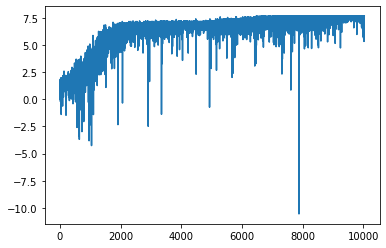

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [9]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["Inventory:"]["rw_inventories"]:
        inventory_levels[i].append(inv)
        i += 1
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | Inventory: {'rw_inventories': array([12, 11, 10])} | Action: [0 0 0] | Reward: 0.08 | 
Steps left: 28 | Inventory: {'rw_inventories': array([11,  9,  7])} | Action: [0 0 0] | Reward: 0.1 | 
Steps left: 27 | Inventory: {'rw_inventories': array([10,  7,  4])} | Action: [0 0 1] | Reward: 0.14 | 
Steps left: 26 | Inventory: {'rw_inventories': array([9, 5, 1])} | Action: [0 0 0] | Reward: 0.26 | 
Steps left: 25 | Inventory: {'rw_inventories': array([8, 3, 6])} | Action: [0 1 1] | Reward: 0.17 | 
Steps left: 24 | Inventory: {'rw_inventories': array([7, 1, 3])} | Action: [0 0 0] | Reward: 0.29 | 
Steps left: 23 | Inventory: {'rw_inventories': array([6, 7, 8])} | Action: [0 0 0] | Reward: 0.13 | 
Steps left: 22 | Inventory: {'rw_inventories': array([5, 5, 5])} | Action: [0 0 1] | Reward: 0.17 | 
Steps left: 21 | Inventory: {'rw_inventories': array([4, 3, 2])} | Action: [0 1 0] | Reward: 0.26 | 
Steps left: 20 | Inventory: {'rw_inventories': array([3, 1, 7])} | Action: [0 0 0] 

###### Inventory level graph

Regional warehouse 1


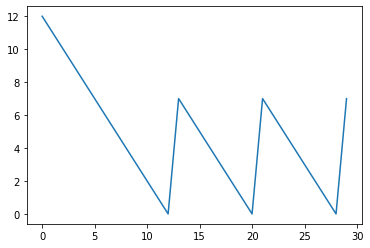

Regional warehouse 2


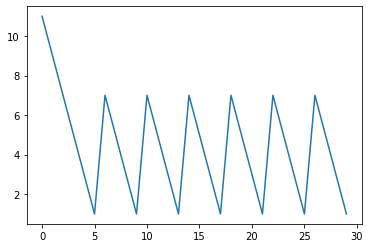

Regional warehouse 3


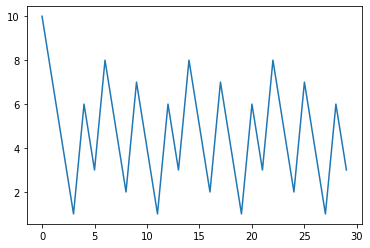

In [10]:
for rw_id in inventory_levels:
    print("Regional warehouse", rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.show()